In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
data = pd.read_excel('Bird Strikes data.xlsx')

In [61]:
data

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,2000-11-23,Caused damage,...,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,30736,1500.0,0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,NaN,2001-07-25,Caused damage,...,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0.0,0,No
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,NaN,2001-09-14,No damage,...,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,N,0,50.0,0,No
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,2002-09-05,No damage,...,False,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,Y,0,50.0,0,Yes
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,NaN,2003-06-23,No damage,...,False,NO DMG REPTD.,Small,No Cloud,European starling,N,0,50.0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25553,321151,Airplane,REDDING MUNICIPAL,> 1000 ft,EMB-120,1,1,NaN,2011-12-30,No damage,...,False,DUCK? NO DMG REPTD.,Large,Overcast,Unknown bird - large,N,0,1500.0,0,No
25554,319677,Airplane,ORLANDO INTL,< 1000 ft,A-321,1,1,NaN,2011-12-30,No damage,...,False,NaN,Small,Some Cloud,Tree swallow,Y,0,0.0,0,No
25555,319680,NaN,NaN,NaN,EC-135,NaN,1,NaN,NaT,No damage,...,False,STRUCK BIRD ON RT FRONT DURING T/O. BIRD REPTD...,NaN,No Cloud,Unknown bird - small,NaN,0,NaN,0,NaN
25556,319679,Airplane,DETROIT METRO WAYNE COUNTY ARPT,< 1000 ft,B-757-200,1,1,NaN,2011-12-31,No damage,...,False,PILOTS REPORT STRIKING UNKNOWN BIRD ON RWY 21L...,Medium,Some Cloud,Unknown bird - medium,Y,0,0.0,0,Yes


In [62]:
data.columns

Index(['Record ID', 'Aircraft: Type', 'Airport: Name', 'Altitude bin',
       'Aircraft: Make/Model', 'Wildlife: Number struck',
       'Wildlife: Number Struck Actual', 'Effect: Impact to flight',
       'FlightDate', 'Effect: Indicated Damage',
       'Aircraft: Number of engines?', 'Aircraft: Airline/Operator',
       'Origin State', 'When: Phase of flight', 'Conditions: Precipitation',
       'Remains of wildlife collected?',
       'Remains of wildlife sent to Smithsonian', 'Remarks', 'Wildlife: Size',
       'Conditions: Sky', 'Wildlife: Species',
       'Pilot warned of birds or wildlife?', 'Cost: Total $',
       'Feet above ground', 'Number of people injured', 'Is Aircraft Large?'],
      dtype='object')

In [63]:
data.head()

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,2000-11-23,Caused damage,...,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,30736,1500.0,0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,NaN,2001-07-25,Caused damage,...,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0.0,0,No
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,NaN,2001-09-14,No damage,...,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,N,0,50.0,0,No
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,2002-09-05,No damage,...,False,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,Y,0,50.0,0,Yes
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,NaN,2003-06-23,No damage,...,False,NO DMG REPTD.,Small,No Cloud,European starling,N,0,50.0,0,No


In [64]:
data.shape

(25558, 26)

In [66]:
missing_values_count = data.isnull().sum()

# Print the count of missing values in each column
print("Missing Values in Each Column:")
print(missing_values_count)

Missing Values in Each Column:
Record ID                                      0
Aircraft: Type                               129
Airport: Name                                129
Altitude bin                                 129
Aircraft: Make/Model                           0
Wildlife: Number struck                      129
Wildlife: Number Struck Actual                 0
Effect: Impact to flight                   23480
FlightDate                                   129
Effect: Indicated Damage                       0
Aircraft: Number of engines?                 267
Aircraft: Airline/Operator                   129
Origin State                                 449
When: Phase of flight                        129
Conditions: Precipitation                  23543
Remains of wildlife collected?                 0
Remains of wildlife sent to Smithsonian        0
Remarks                                     4771
Wildlife: Size                               129
Conditions: Sky                       

In [67]:
# Fill missing values in the 'Aircraft: Type' column with the most frequent value
most_frequent_aircraft_type = data['Aircraft: Type'].mode()[0]
data['Aircraft: Type'].fillna(most_frequent_aircraft_type, inplace=True)

# Verify that missing values have been filled
print("Number of missing values in 'Aircraft: Type' after filling:", data['Aircraft: Type'].isnull().sum())

Number of missing values in 'Aircraft: Type' after filling: 0


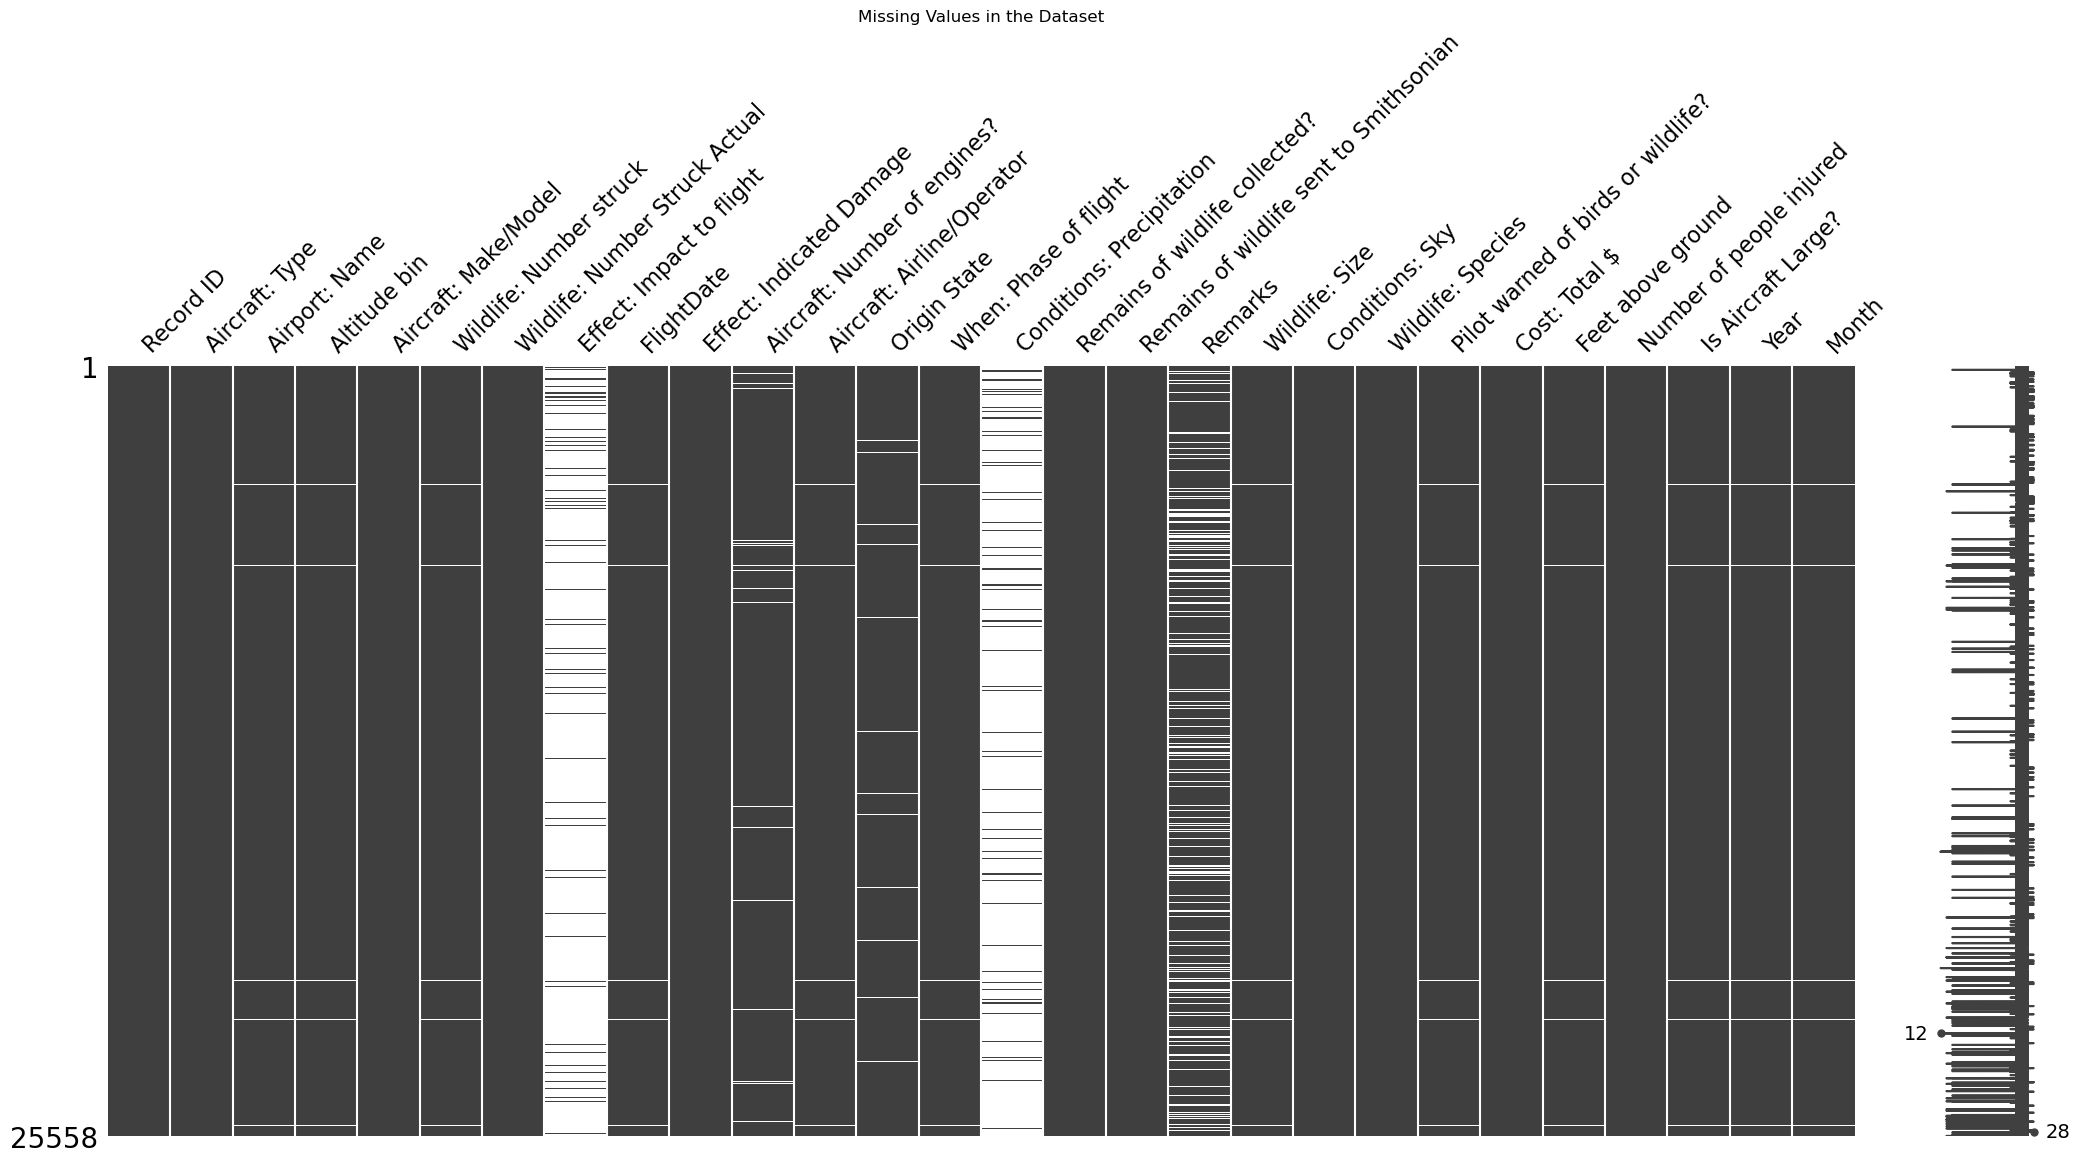

In [83]:
import missingno as msno
msno.matrix(data)
plt.title('Missing Values in the Dataset')
plt.show()

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25558 entries, 0 to 25557
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Record ID                                25558 non-null  int64         
 1   Aircraft: Type                           25558 non-null  object        
 2   Airport: Name                            25429 non-null  object        
 3   Altitude bin                             25429 non-null  object        
 4   Aircraft: Make/Model                     25558 non-null  object        
 5   Wildlife: Number struck                  25429 non-null  object        
 6   Wildlife: Number Struck Actual           25558 non-null  int64         
 7   Effect: Impact to flight                 2078 non-null   object        
 8   FlightDate                               25429 non-null  datetime64[ns]
 9   Effect: Indicated Damage               

In [69]:
data.describe()

,Record ID,Wildlife: Number Struck Actual,FlightDate,Cost: Total $,Feet above ground,Number of people injured
count,25558.000000,25558.000000,25429,2.555800e+04,25429.000000,25558.000000
mean,253916.085609,2.691525,2007-01-22 13:20:40.017303040,5.567354e+03,799.028432,0.001056
min,1195.000000,1.000000,2000-01-02 00:00:00,0.000000e+00,0.000000,0.000000
25%,225783.750000,1.000000,2004-06-17 00:00:00,0.000000e+00,0.000000,0.000000
50%,248749.000000,1.000000,2007-07-29 00:00:00,0.000000e+00,50.000000,0.000000
75%,269168.750000,1.000000,2009-11-01 00:00:00,0.000000e+00,700.000000,0.000000
max,321909.000000,942.000000,2011-12-31 00:00:00,1.239775e+07,18000.000000,6.000000
std,38510.453382,12.793975,NaN,1.219713e+05,1740.079843,0.050420


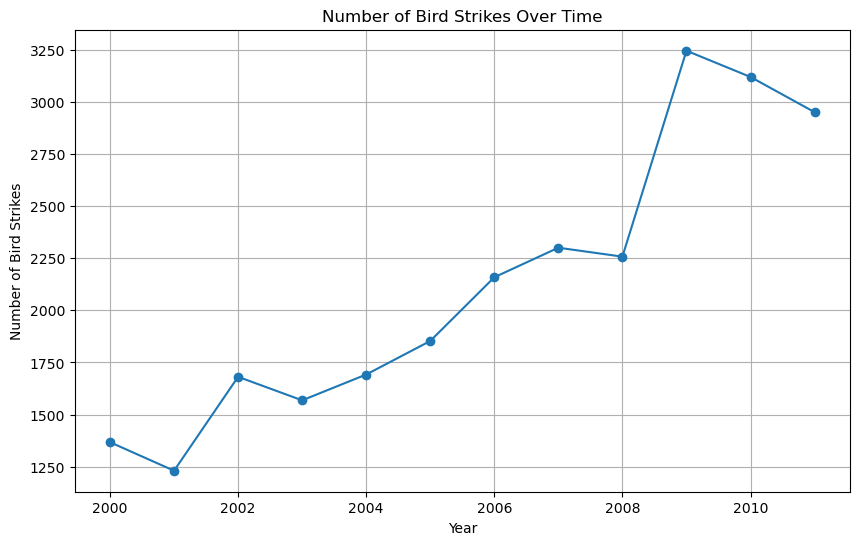

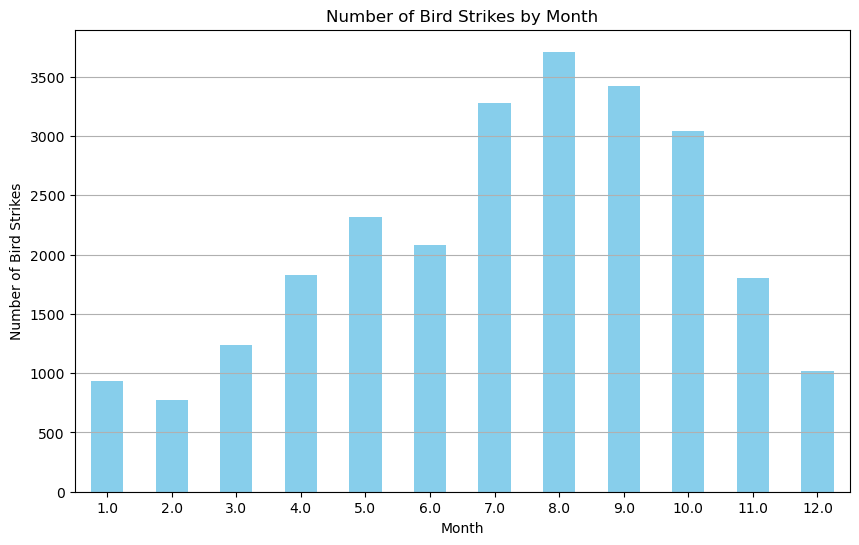

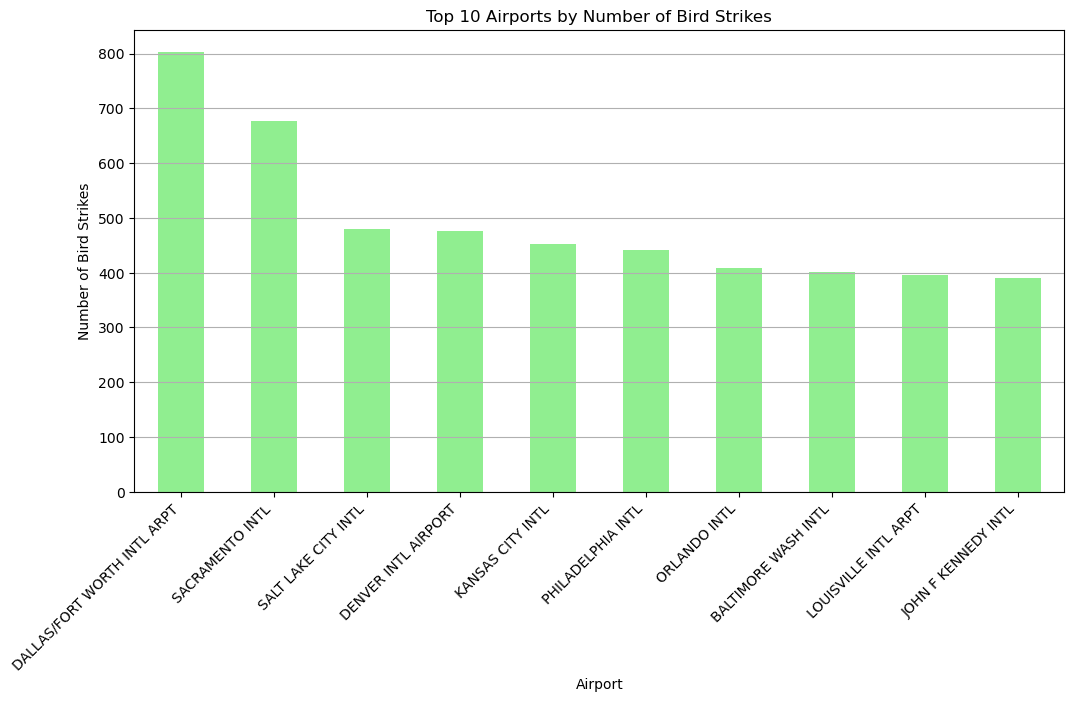

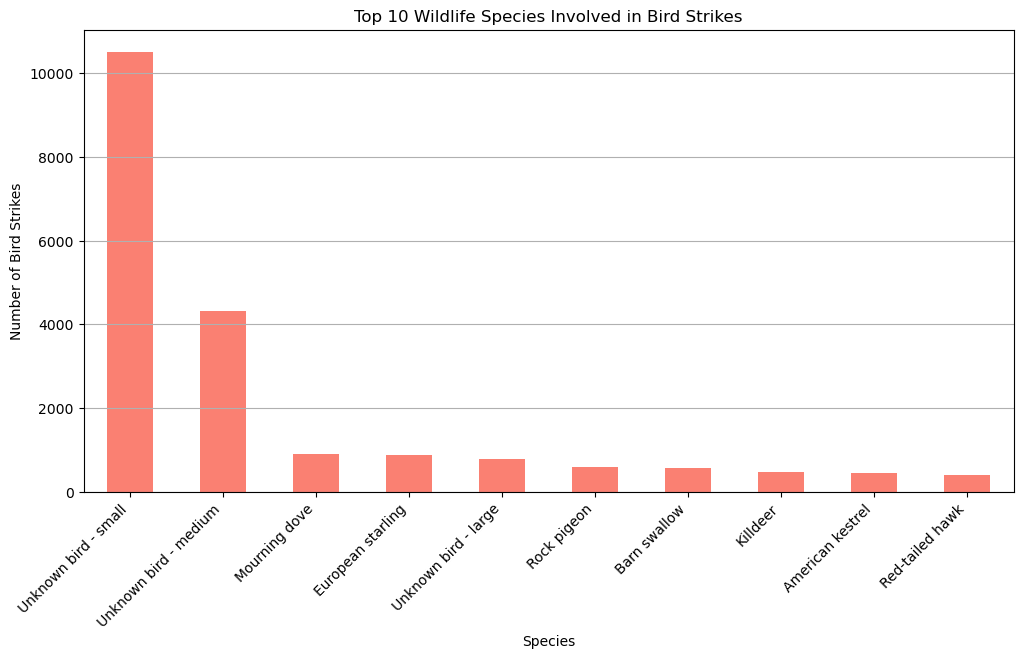

In [70]:
# Ensure the 'FlightDate' column is in datetime format
data['FlightDate'] = pd.to_datetime(data['FlightDate'])

# Create a new column for the year and month
data['Year'] = data['FlightDate'].dt.year
data['Month'] = data['FlightDate'].dt.month

# 1. Line Plot of Bird Strikes Over Time
plt.figure(figsize=(10, 6))
data.groupby('Year').size().plot(kind='line', marker='o')
plt.title('Number of Bird Strikes Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Bird Strikes')
plt.grid(True)
plt.show()

# 2. Bar Plot of Bird Strikes by Month
plt.figure(figsize=(10, 6))
data.groupby('Month').size().plot(kind='bar', color='skyblue')
plt.title('Number of Bird Strikes by Month')
plt.xlabel('Month')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

# 3. Bar Plot of Bird Strikes by Airport
top_airports = data['Airport: Name'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_airports.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Airports by Number of Bird Strikes')
plt.xlabel('Airport')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

# 4. Bar Plot of Bird Strikes by Wildlife Species
top_species = data['Wildlife: Species'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_species.plot(kind='bar', color='salmon')
plt.title('Top 10 Wildlife Species Involved in Bird Strikes')
plt.xlabel('Species')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()


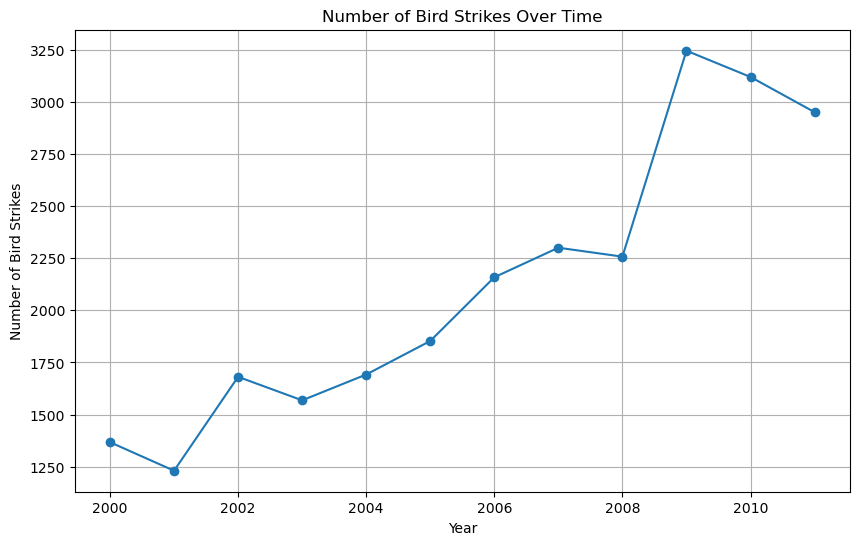

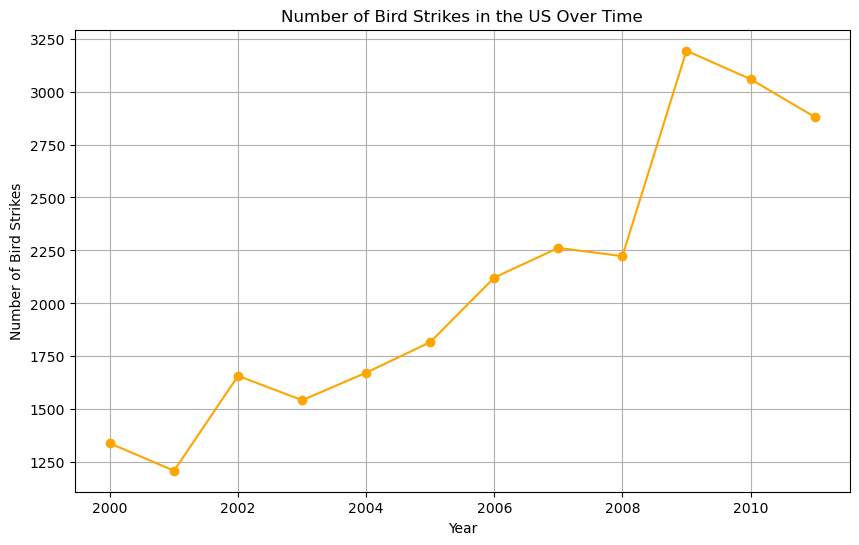

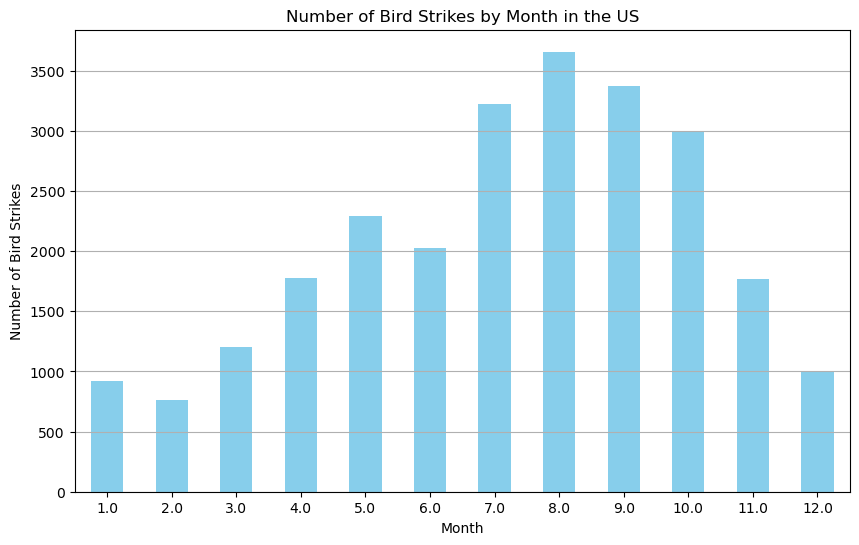

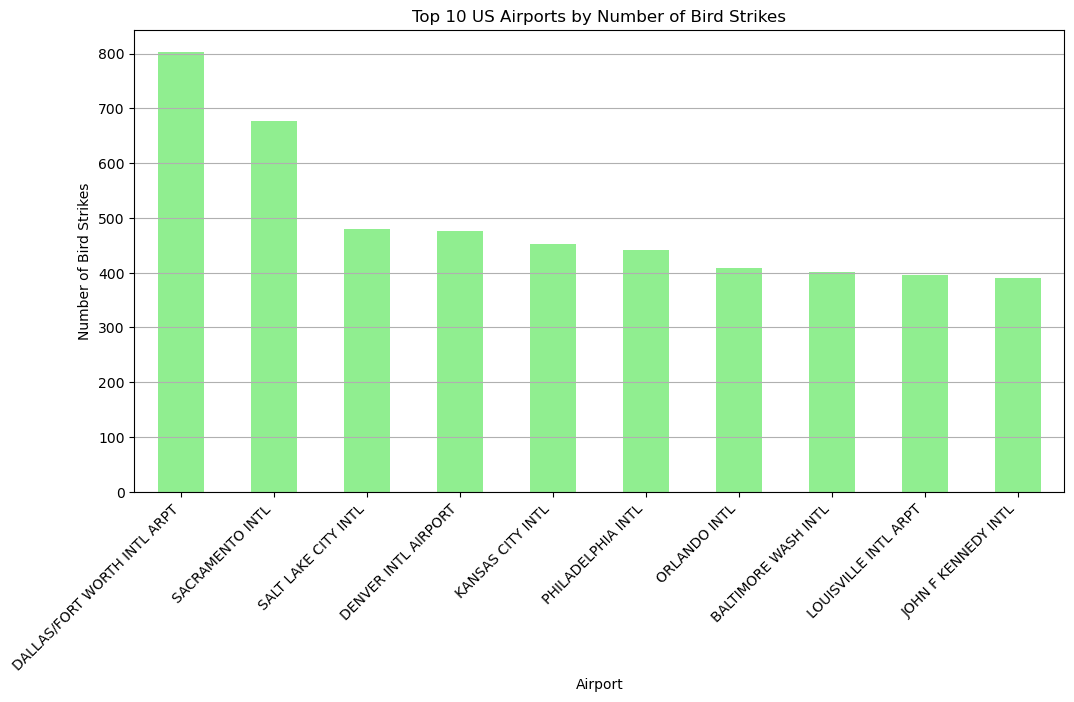

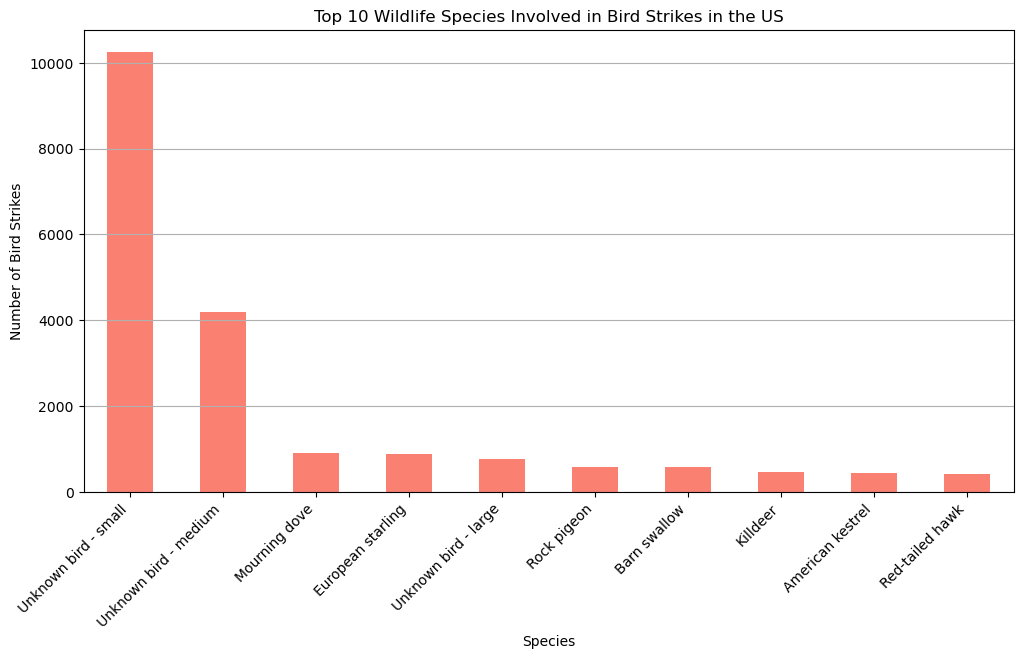

In [71]:
# 1. Yearly Analysis of Bird Strikes
plt.figure(figsize=(10, 6))
data.groupby('Year').size().plot(kind='line', marker='o')
plt.title('Number of Bird Strikes Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Bird Strikes')
plt.grid(True)
plt.show()

# 2. Bird Strikes in the US Over Time
us_data = data[data['Origin State'].notnull() & (data['Origin State'] != '')]  # Assuming 'Origin State' is the indicator for US
plt.figure(figsize=(10, 6))
us_data.groupby('Year').size().plot(kind='line', marker='o', color='orange')
plt.title('Number of Bird Strikes in the US Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Bird Strikes')
plt.grid(True)
plt.show()

# Additional visualizations

# Bar Plot of Bird Strikes by Month (US)
plt.figure(figsize=(10, 6))
us_data.groupby('Month').size().plot(kind='bar', color='skyblue')
plt.title('Number of Bird Strikes by Month in the US')
plt.xlabel('Month')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

# Bar Plot of Bird Strikes by Airport (US)
top_us_airports = us_data['Airport: Name'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_us_airports.plot(kind='bar', color='lightgreen')
plt.title('Top 10 US Airports by Number of Bird Strikes')
plt.xlabel('Airport')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

# Bar Plot of Bird Strikes by Wildlife Species (US)
top_us_species = us_data['Wildlife: Species'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_us_species.plot(kind='bar', color='salmon')
plt.title('Top 10 Wildlife Species Involved in Bird Strikes in the US')
plt.xlabel('Species')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()


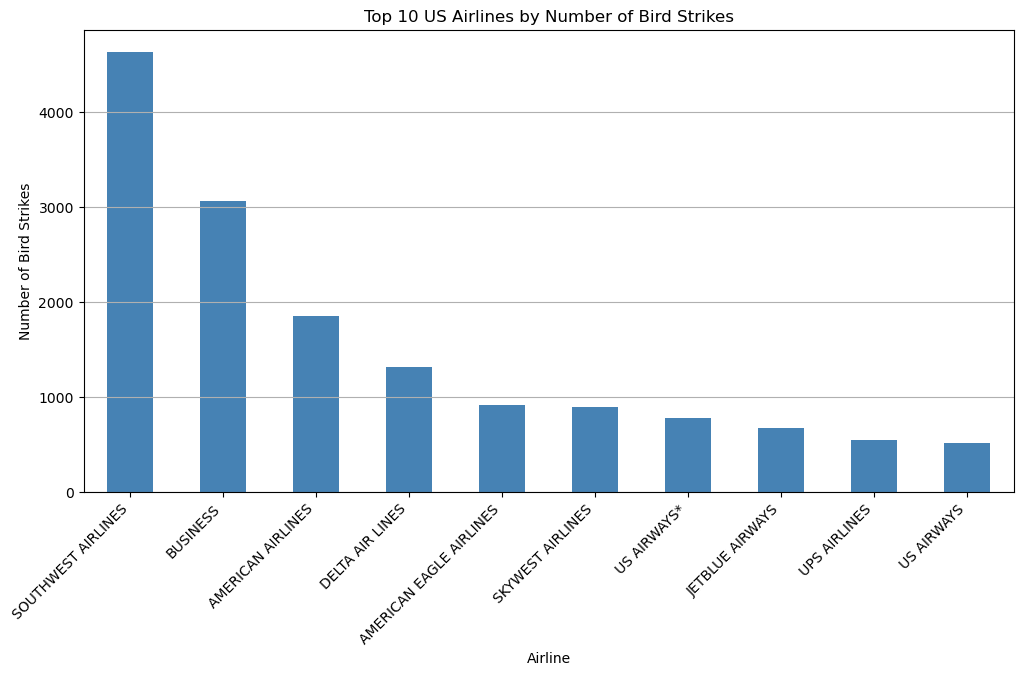

In [72]:
# Filter data for US incidents
us_data = data[data['Origin State'].notnull() & (data['Origin State'] != '')]

# Count the number of bird strikes per airline
top_us_airlines = us_data['Aircraft: Airline/Operator'].value_counts().head(10)

# Plot the top 10 US airlines by number of bird strikes
plt.figure(figsize=(12, 6))
top_us_airlines.plot(kind='bar', color='steelblue')
plt.title('Top 10 US Airlines by Number of Bird Strikes')
plt.xlabel('Airline')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

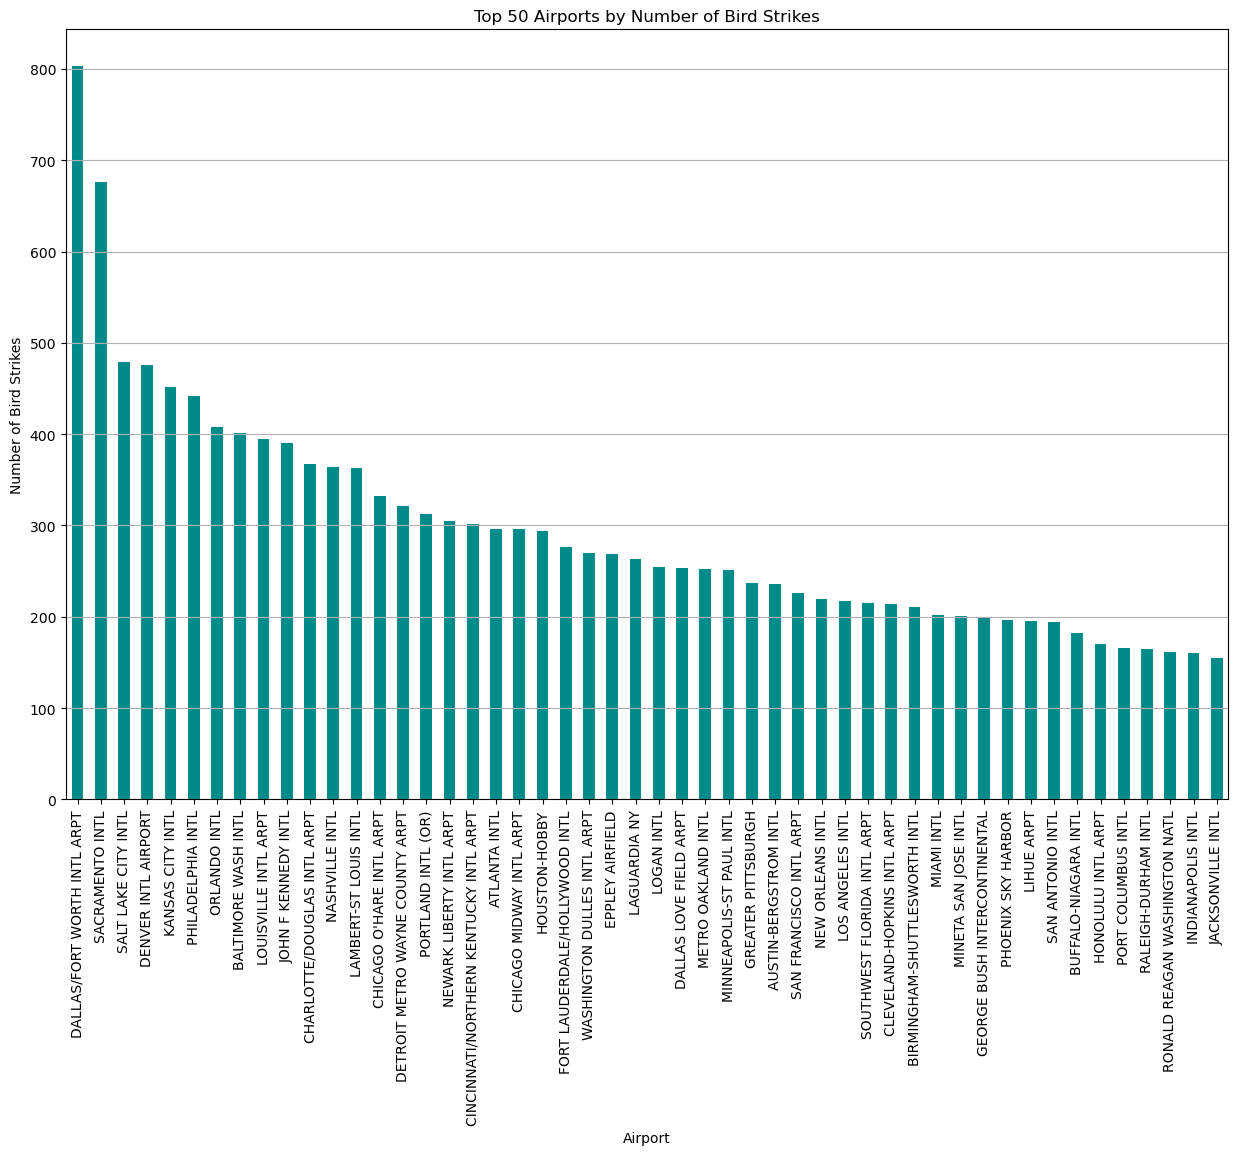

In [73]:
# Count the number of bird strikes per airport
top_airports = data['Airport: Name'].value_counts().head(50)

# Plot the top 50 airports by number of bird strikes
plt.figure(figsize=(15, 10))
top_airports.plot(kind='bar', color='darkcyan')
plt.title('Top 50 Airports by Number of Bird Strikes')
plt.xlabel('Airport')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

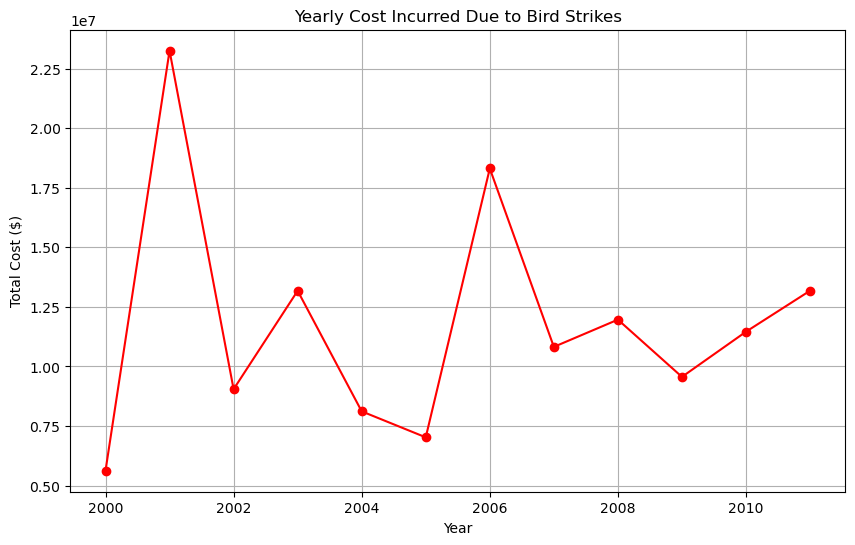

In [74]:
# Extract the year from the 'FlightDate' column
data['Year'] = data['FlightDate'].dt.year

# Ensure the 'Cost: Total $' column is numeric, replacing non-numeric entries with NaN
data['Cost: Total $'] = pd.to_numeric(data['Cost: Total $'], errors='coerce')

# Group by year and sum the costs
yearly_cost = data.groupby('Year')['Cost: Total $'].sum()

# Plot the yearly cost incurred due to bird strikes
plt.figure(figsize=(10, 6))
yearly_cost.plot(kind='line', marker='o', color='red')
plt.title('Yearly Cost Incurred Due to Bird Strikes')
plt.xlabel('Year')
plt.ylabel('Total Cost ($)')
plt.grid(True)
plt.show()

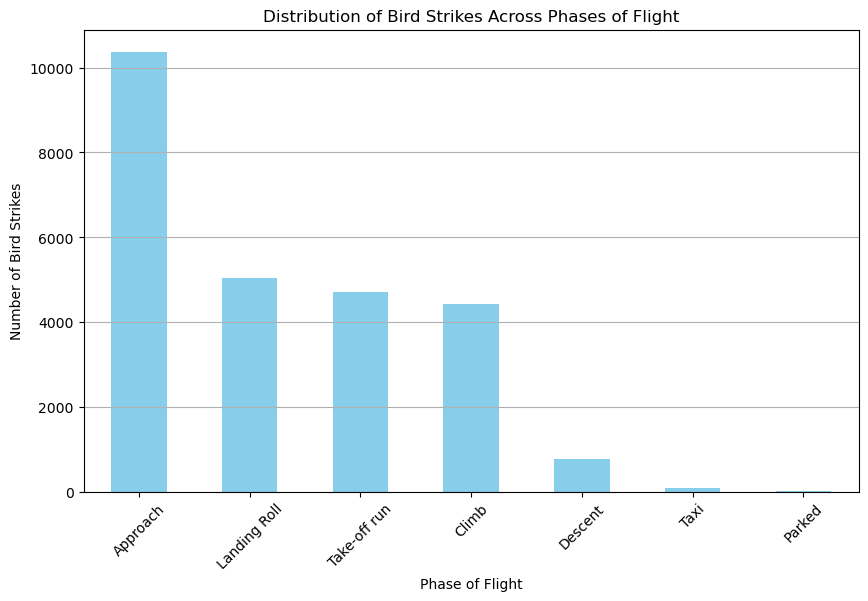

In [75]:

# Count the number of bird strikes for each phase of flight
phase_counts = data['When: Phase of flight'].value_counts()

# Plot the distribution of bird strikes across different phases of flight
plt.figure(figsize=(10, 6))
phase_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Bird Strikes Across Phases of Flight')
plt.xlabel('Phase of Flight')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

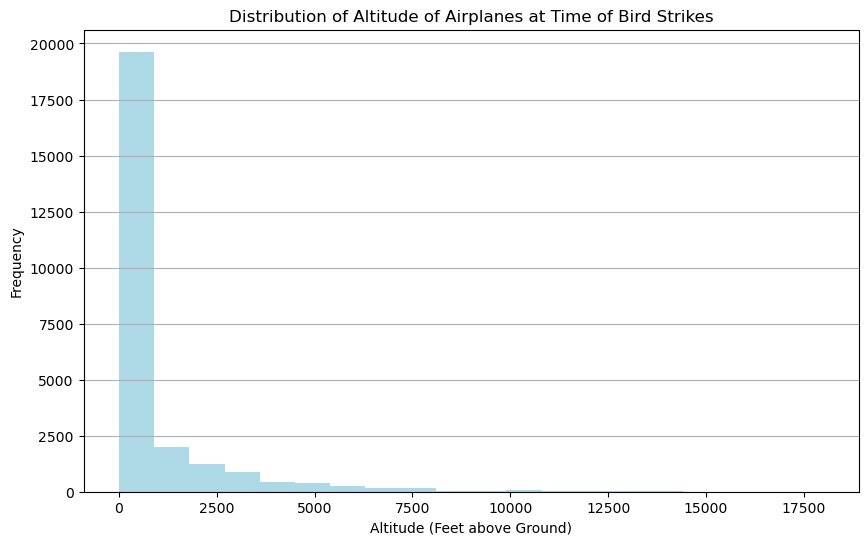

In [76]:
# Filter out rows where altitude information is missing
data_with_altitude = data[data['Feet above ground'].notnull()]

# Plot a histogram of altitudes
plt.figure(figsize=(10, 6))
plt.hist(data_with_altitude['Feet above ground'], bins=20, color='lightblue')
plt.title('Distribution of Altitude of Airplanes at Time of Bird Strikes')
plt.xlabel('Altitude (Feet above Ground)')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

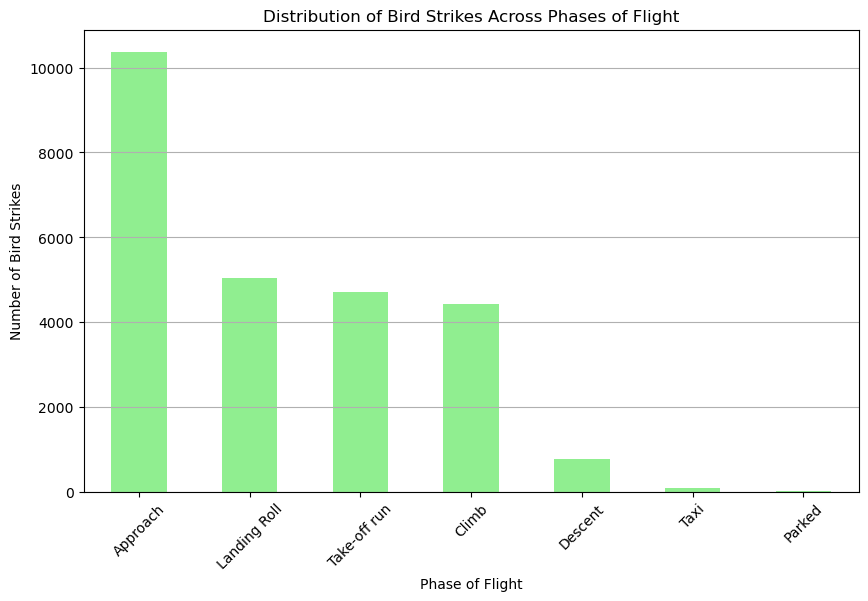

In [77]:
# Count the number of bird strikes for each phase of flight
phase_counts = data['When: Phase of flight'].value_counts()

# Plot the distribution of bird strikes across different phases of flight
plt.figure(figsize=(10, 6))
phase_counts.plot(kind='bar', color='lightgreen')
plt.title('Distribution of Bird Strikes Across Phases of Flight')
plt.xlabel('Phase of Flight')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

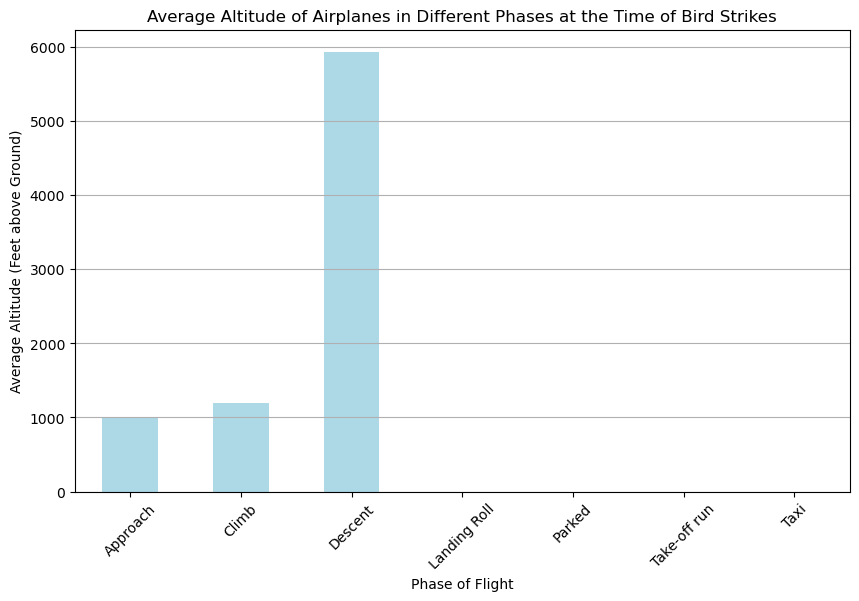

In [78]:
# Filter out rows where altitude information is missing
data_with_altitude = data[data['Feet above ground'].notnull()]

# Group the data by phase of flight and calculate the mean altitude for each phase
mean_altitude_by_phase = data_with_altitude.groupby('When: Phase of flight')['Feet above ground'].mean()

# Plot the average altitude for different phases of flight
plt.figure(figsize=(10, 6))
mean_altitude_by_phase.plot(kind='bar', color='lightblue')
plt.title('Average Altitude of Airplanes in Different Phases at the Time of Bird Strikes')
plt.xlabel('Phase of Flight')
plt.ylabel('Average Altitude (Feet above Ground)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

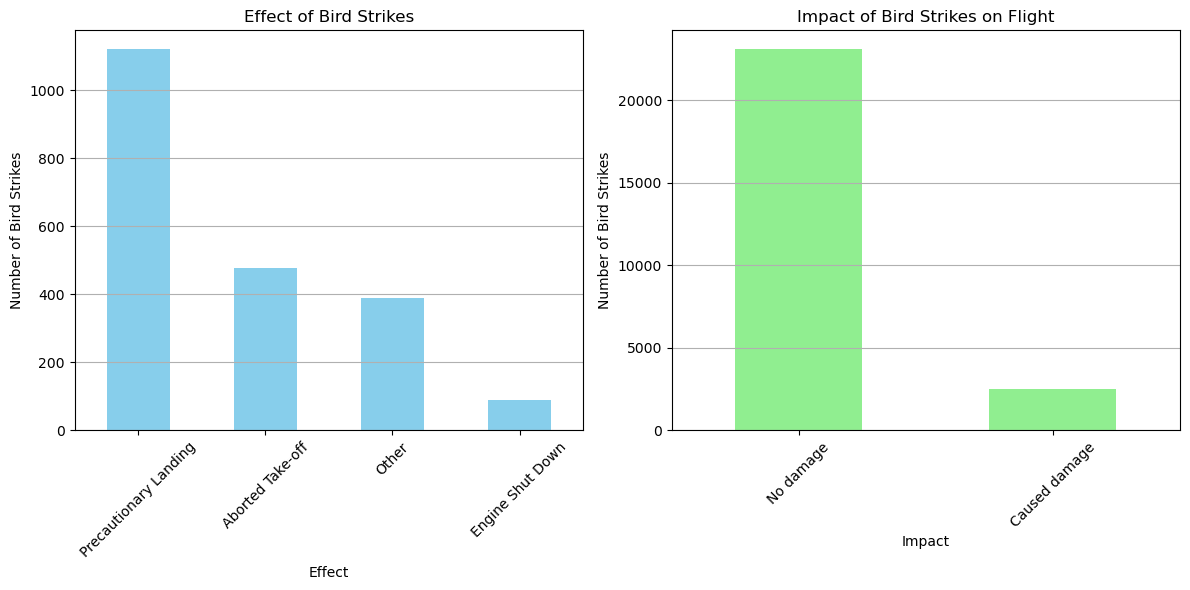

In [79]:
# Count the number of occurrences for each effect of bird strikes
effect_counts = data['Effect: Impact to flight'].value_counts()

# Count the number of occurrences for each reported impact on flight
impact_counts = data['Effect: Indicated Damage'].value_counts()

# Plot the distribution of effects of bird strikes
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
effect_counts.plot(kind='bar', color='skyblue')
plt.title('Effect of Bird Strikes')
plt.xlabel('Effect')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Plot the distribution of impacts on flight
plt.subplot(1, 2, 2)
impact_counts.plot(kind='bar', color='lightgreen')
plt.title('Impact of Bird Strikes on Flight')
plt.xlabel('Impact')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

C:\Users\ROHIT\AppData\Local\Temp\ipykernel_12564\1544883827.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_with_altitude['Altitude Bin'] = pd.cut(data_with_altitude['Feet above ground'], bins=altitude_bins, labels=labels, right=False)
C:\Users\ROHIT\AppData\Local\Temp\ipykernel_12564\1544883827.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  effect_counts_by_altitude = data_with_altitude.groupby(['Altitude Bin', 'Effect: Impact to flight']).size().unstack(fill_value=0)


<Figure size 1200x600 with 0 Axes>

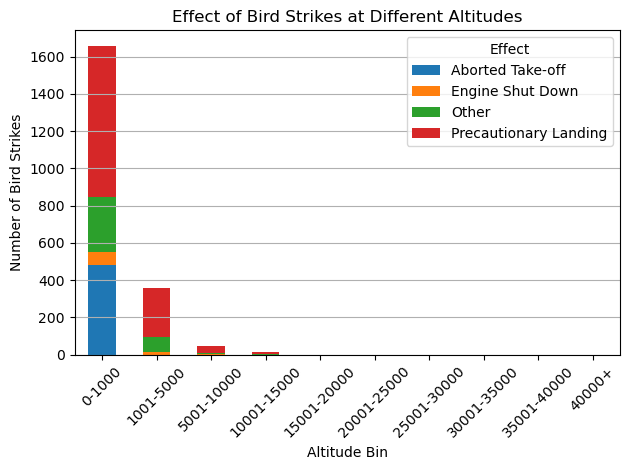

In [80]:
# Filter out rows where altitude information is missing
data_with_altitude = data[data['Feet above ground'].notnull()]

# Define altitude bins
altitude_bins = [0, 1000, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, float('inf')]
labels = ['0-1000', '1001-5000', '5001-10000', '10001-15000', '15001-20000', '20001-25000', '25001-30000', '30001-35000', '35001-40000', '40000+']

# Bin the altitude data
data_with_altitude['Altitude Bin'] = pd.cut(data_with_altitude['Feet above ground'], bins=altitude_bins, labels=labels, right=False)

# Count the number of occurrences for each effect of bird strikes in each altitude bin
effect_counts_by_altitude = data_with_altitude.groupby(['Altitude Bin', 'Effect: Impact to flight']).size().unstack(fill_value=0)

# Plot the distribution of effects of bird strikes at different altitudes
plt.figure(figsize=(12, 6))
effect_counts_by_altitude.plot(kind='bar', stacked=True)
plt.title('Effect of Bird Strikes at Different Altitudes')
plt.xlabel('Altitude Bin')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45)
plt.legend(title='Effect')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

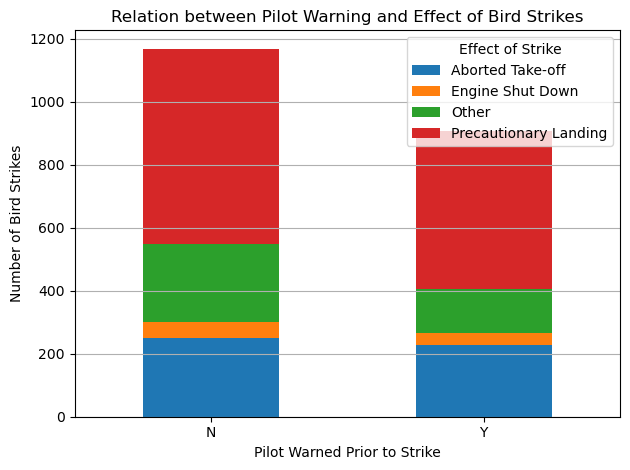

In [81]:
# Filter out rows where information about pilot warning and effect of strike is missing
filtered_data = data[(data['Pilot warned of birds or wildlife?'].notnull()) & (data['Effect: Impact to flight'].notnull())]

# Count the number of occurrences for each combination of pilot warning and effect of strike
warning_effect_counts = filtered_data.groupby(['Pilot warned of birds or wildlife?', 'Effect: Impact to flight']).size().unstack(fill_value=0)

# Plot the distribution of pilot warning and effect of strike
plt.figure(figsize=(10, 6))
warning_effect_counts.plot(kind='bar', stacked=True)
plt.title('Relation between Pilot Warning and Effect of Bird Strikes')
plt.xlabel('Pilot Warned Prior to Strike')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=0)
plt.legend(title='Effect of Strike')
plt.grid(axis='y')
plt.tight_layout()
plt.show()
